[Powrót do zadania 2](./2_main.ipynb)

[Poprzednie: 2.4.](./2_4.ipynb)

# 2.5.

>**Polecenie:** Dla $r = 1$ i $K = 1$, używając symulacji wynikających z JSE, wygeneruj wykres stanu stacjonarnego $N^∗$ w zależności od parametru odłowów $k \in [0, 2]$.

**Rozwiązanie:**

(a) r=1, k=0.5, K=1: dt_max (lokalnie) = 4.0000


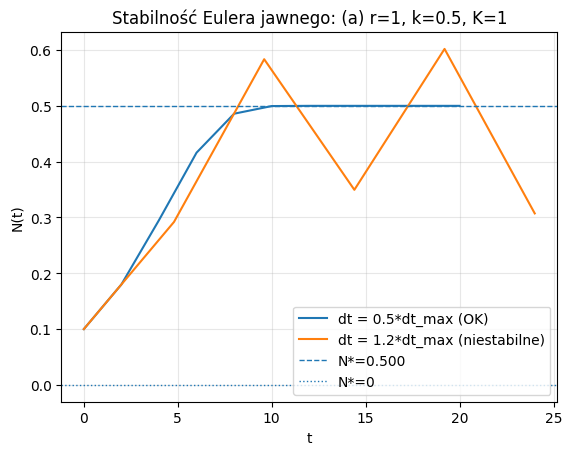

(b) r=1, k=1.5, K=1: dt_max (lokalnie) = 4.0000


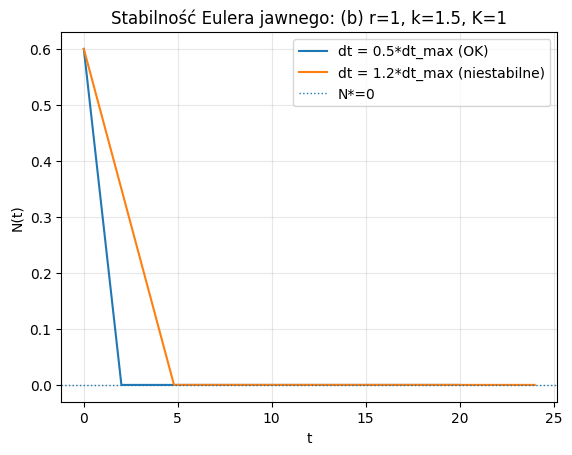

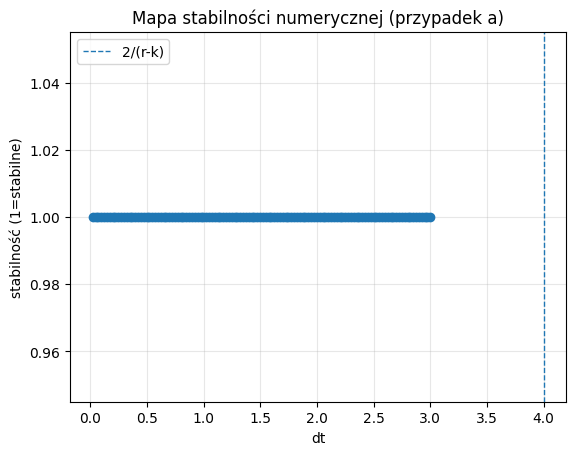

In [ ]:
# (2.5) Warunek stabilności JSE (Euler jawny) i demonstracja
# Model: dN/dt = r*N*(1 - N/K) - k*N
# Idea: dla metody Eulera jawnego stabilność lokalna wokół stabilnego stanu stacjonarnego
#      jest przybliżona warunkiem testowym dla y' = λ y: |1 + λ*dt| < 1  =>  dt < -2/λ (dla λ<0).
#      Dla modelu logistycznego z odłowem:
#         f(N) = r*N*(1 - N/K) - k*N
#         f'(N) = (r - k) - 2r*N/K
#      Stabilny stan:
#         • jeśli r > k:  N* = K*(r - k)/r,  wtedy f'(N*) = -(r - k)  =>  dt_max = 2/(r - k)
#         • jeśli r < k:  N* = 0            wtedy f'(0)  =  (r - k)<0 =>  dt_max = 2/(k - r)
#         • jeśli r = k:  f'(N*) = 0  (granica) — metoda wymaga bardzo małego dt.

def euler_explicit(N0, r, K, k, t0, t_end, dt, clip_nonneg=True):
    steps = int(np.ceil((t_end - t0) / dt))
    t = np.linspace(t0, t0 + steps*dt, steps + 1)
    N = np.empty(steps + 1, dtype=float); N[0] = N0
    for n in range(steps):
        N[n+1] = N[n] + dt * rhs(N[n], r, K, k)
        if clip_nonneg and N[n+1] < 0:
            N[n+1] = 0.0
    return t, N

def dt_max_stability(r, K, k):
    if r > k:
        return 2.0 / (r - k)   # stabilny dodatni stan
    elif k > r:
        return 2.0 / (k - r)   # stabilne N*=0
    else:
        return np.inf          # granica; praktycznie wymagaj bardzo małego dt

# ===== Przykłady: (a) r=1, k=0.5, K=1; (b) r=1, k=1.5, K=1 =====
cases = [
    {"name": "(a) r=1, k=0.5, K=1", "r":1.0, "k":0.5, "K":1.0, "N0":0.1},
    {"name": "(b) r=1, k=1.5, K=1", "r":1.0, "k":1.5, "K":1.0, "N0":0.6},
]

for C in cases:
    r, k, K, N0 = C["r"], C["k"], C["K"], C["N0"]
    dtcrit = dt_max_stability(r, K, k)
    print(f'{C["name"]}: dt_max (lokalnie) = {dtcrit:.4f}')

    # pokaż porównanie dla dt = 0.5*dtcrit (stabilny) i dt = 1.2*dtcrit (niestabilny/oscylacyjny)
    dts = [0.5*dtcrit, 1.2*dtcrit if np.isfinite(dtcrit) else 0.5]  # fallback gdy inf
    labels = ["dt = 0.5*dt_max (OK)", "dt = 1.2*dt_max (niestabilne)"] if np.isfinite(dtcrit) else \
             ["dt = 0.5 (OK?)", "dt = 0.5 (drugi przebieg)"]

    plt.figure()
    for dt, lab in zip(dts, labels):
        t, N = euler_explicit(N0=N0, r=r, K=K, k=k, t0=0.0, t_end=20.0, dt=dt)
        plt.plot(t, N, label=lab)
    # linie stanów stacjonarnych
    Nstar_pos = K*(r - k)/r
    if Nstar_pos > 0:
        plt.axhline(Nstar_pos, ls="--", lw=1, label=f"N*={Nstar_pos:.3f}")
    plt.axhline(0.0, ls=":", lw=1, label="N*=0")
    plt.xlabel("t"); plt.ylabel("N(t)")
    plt.title(f"Stabilność Eulera jawnego: {C['name']}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Dodatkowo: skan po dt i ocena stabilności numerycznej (czy zbiega w pobliże stabilnego N*)
def scan_dt_stability(r=1.0, k=0.5, K=1.0, N0=0.2, dt_vals=None, T=50.0):
    if dt_vals is None:
        dt_vals = np.linspace(0.01, 2.5, 80)
    # cel zbieżności
    Nstar = K*(r - k)/r if r > k else 0.0
    results = []
    for dt in dt_vals:
        t, N = euler_explicit(N0, r, K, k, 0.0, T, dt)
        stable = np.isfinite(N).all() and not np.any(np.isnan(N)) and np.abs(N[-1] - Nstar) < 1e-2
        results.append((dt, stable))
    return np.array(results)

# Przykład skanu dla (a): potwierdza, że granica ~ 2/(r-k) = 2.0
r, k, K = 1.0, 0.5, 1.0
res = scan_dt_stability(r, k, K, N0=0.1, dt_vals=np.linspace(0.02, 3.0, 120))
plt.figure()
plt.plot(res[:,0], res[:,1].astype(int), marker="o", ls="")
plt.axvline(2/(r-k), ls="--", lw=1, label="2/(r-k)")
plt.xlabel("dt"); plt.ylabel("stabilność (1=stabilne)")
plt.title("Mapa stabilności numerycznej (przypadek a)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()


[Powrót do widoku głównego](../lista_1.ipynb)